Datensatz:
http://vis-www.cs.umass.edu/lfw/

## Klassen und Methoden importieren

In [1]:
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Daten herunterladen als numpy Array

Jetzt importieren wir den LFW_people Datensatz mithilfe der Funktion fetch_lfw_people von sklearn. LFW_prople ist der Vorverarbeitungsauszug von LFW. Es enthält **13233 Bilder von 5749 Formklassen 125 * 94**. Die Funktion stellt einen Parameter min_faces_per_person bereit. Mit diesem Parameter können wir die Klassen auswählen, die mindestens min_faces_per_person unterschiedliche Bilder haben. Diese Funktion verfügt auch über eine Parametergröße, mit der die Größe jedes Bilds in der extrahierten Fläche geändert wird. Wir verwenden min_faces_per_person = 70 und resize = 0.4.

In [2]:
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

In [3]:
for name in lfw_people.target_names:
    print(name)

Ariel Sharon
Colin Powell
Donald Rumsfeld
George W Bush
Gerhard Schroeder
Hugo Chavez
Tony Blair


In [4]:
#print(lfw_people.DESCR)

In [5]:
lfw_people.images.dtype

dtype('float32')

In [6]:
lfw_people.images.shape

(1288, 50, 37)

In [7]:
test = lfw_people.images[0]

In [8]:
print(test)

[[254.       254.       251.66667  ...  65.333336  50.666668  40.333332]
 [253.33333  251.33333  247.33333  ...  66.666664  52.        42.666668]
 [240.66667  231.66667  211.66667  ...  62.        49.        42.      ]
 ...
 [ 74.333336  54.        31.666666 ...  97.666664  93.        90.      ]
 [ 65.333336  47.        30.333334 ...  91.666664  92.        86.333336]
 [ 59.333332  44.333332  32.333332 ...  87.333336  88.666664  86.666664]]


In [9]:
import numpy as np
np.savetxt('test.out', test, fmt='%.0f', delimiter=',')

In [10]:
n_samples, h, w = lfw_people.images.shape 

## Verifikation eines Bildes

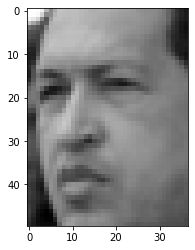

In [11]:
plt.imshow(lfw_people.images[0], cmap=plt.cm.gray)

In [12]:
lfw_people.data.shape

(1288, 1850)

## Featurevektoren und Zielklassen definieren ...

In [13]:
# Für ML werden die Daten in Vektor-Schreibweise benötigt ... 
X = lfw_people.data
n_features = X.shape[1] # 1850

In [14]:
# Das Label für die Zielvariable ...
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print("Gesamtgröße den Datensatzes:")
print("n_samples: %d" % n_samples)
print("n_features: %d" % n_features)
print("n_classes: %d" % n_classes)

Gesamtgröße den Datensatzes:
n_samples: 1288
n_features: 1850
n_classes: 7


## Datensatz splitten

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)

print("Größe des Trainingsdatensatzes: % d \nGröße des Testdatensatzes: % d" %( 
        y_train.shape[0], y_test.shape[0])) 

Größe des Trainingsdatensatzes:  966 
Größe des Testdatensatzes:  322


## Berechne PCA - Nicht unterstützte Feature Extraktion / Dimensionsreduktion
Weitere Infos zu PCA: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

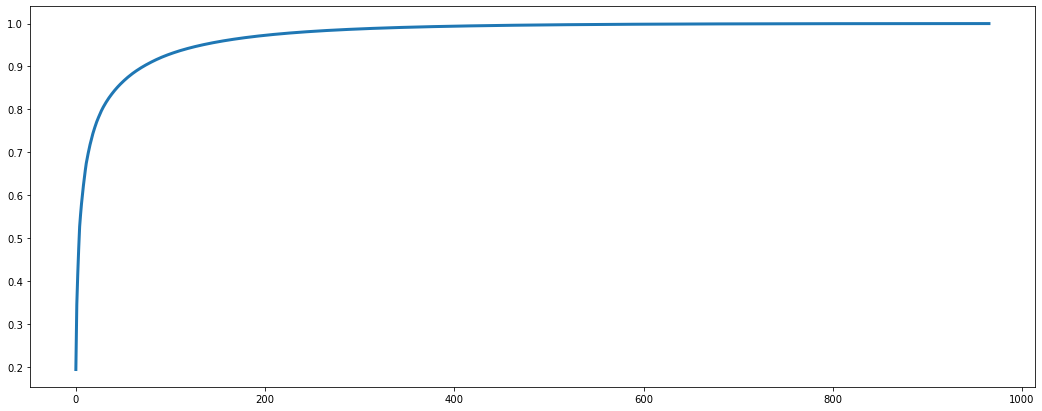

In [16]:
pca = PCA().fit(X_train)

plt.figure(figsize=(18, 7))
plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3)

In [17]:
np.where(pca.explained_variance_ratio_.cumsum() > 0.95)

(array([134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
        147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
        160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172,
        173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185,
        186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198,
        199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211,
        212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224,
        225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237,
        238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250,
        251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263,
        264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276,
        277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289,
        290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302,
        303, 304, 305, 306, 307, 308, 309, 310, 311

In [18]:
n_components = 134

print("Extrahiere top %d Eigenfaces von %d Gesichtern." % (n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)
print("Fertig nach %0.3fs" % (time() - t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print("\nProjizieren der Eingabedaten auf die orthonormale Basis der Eigenfaces")
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("Fertig nach %0.3fs" % (time() - t0))

Extrahiere top 134 Eigenfaces von 966 Gesichtern.
Fertig nach 0.078s

Projizieren der Eingabedaten auf die orthonormale Basis der Eigenfaces
Fertig nach 0.012s


## Visualisierung der Eigenfaces

In [19]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

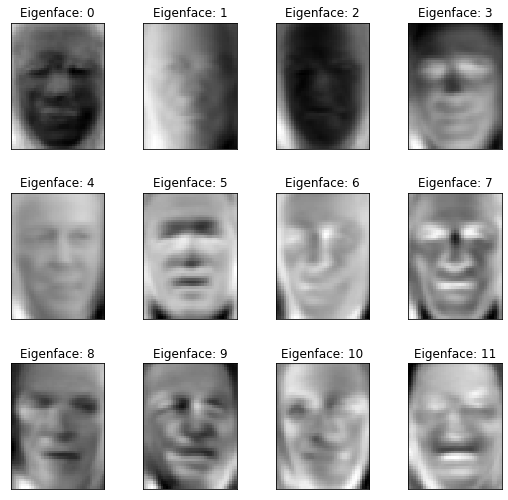

In [20]:
eigenface_titles = ["Eigenface: %d" % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)

In [21]:
print("Beispieldatensatz nach Anwendung von PCA\n", X_train_pca[0]) 
print("-----------------------------------------------------") 
print("Dimensionen des Trainingsdatensatzes = % s \nDimensionen des Testdatensatzes  = % s"%( 
        X_train_pca.shape, X_test_pca.shape)) 

Beispieldatensatz nach Anwendung von PCA
 [-2.0756056  -1.0457791   2.1269383   0.03682655 -0.75757265 -0.5173681
  0.8555076   1.0519336   0.45774502  0.01348718 -0.03963521  0.6387276
  0.48166957  2.3378386   1.7784741   0.13310313 -2.2713408  -4.456939
  2.0976744  -1.1379448   0.18842837 -0.3349589   1.1254563  -0.3240291
  0.14094613  1.0769567   0.75881356 -0.09976924  3.119961    0.88378567
 -0.89342004  1.1595923   1.4307089   1.6855328   1.3434764  -1.2590818
 -0.6390769  -2.3363018  -0.01366681 -1.4640008  -0.46883067 -1.0546864
 -1.3328243   1.1366239   2.2227833  -1.8016034  -0.30635032 -1.0281514
  4.7736177   3.460215    1.9256326  -1.3514831  -0.25919738  2.0104935
 -1.0568501   0.36204824  1.169841    0.75863844  0.90066624  0.60095316
 -0.46528298  2.0973423   1.3463538   1.9339201   5.0674105  -0.7070828
  0.608765   -0.904514   -0.21184756 -2.101163   -1.6826315  -0.20185238
 -1.7427866  -3.059177    2.051007    0.39413524  0.12852858  1.2062613
 -0.80748826 -1.3834

## Training des SVM Klassifikationsmodells
Weitere Infos: https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

In [22]:
# t0 = time()
# clf = classifier = SVC(gamma='auto').fit(X_train_pca, y_train)
# print("Fertig nach %0.3fs" % (time() - t0))

In [23]:
SVC??

In [24]:
print("Fitting des Klassifizierers anhand des Trainingsdatensatzes")
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1], }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'),
                   param_grid, cv=5, iid=False)
clf = clf.fit(X_train_pca, y_train)
print("Fertig nach %0.3fs" % (time() - t0))
print("Der beste per Gridsearch gefundene Klassifizierer:\n")
print(clf.best_estimator_)

Fitting des Klassifizierers anhand des Trainingsdatensatzes
Fertig nach 26.085s
Der beste per Gridsearch gefundene Klassifizierer:

SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


## Validierung des Modells

In [25]:
print("Vorhersage der Namen für den Testdatensatz ...")
t0 = time()
y_pred = clf.predict(X_test_pca)
print("Fertig nach %0.3fs" % (time() - t0))
print(classification_report(y_test, y_pred, target_names=target_names))

Vorhersage der Namen für den Testdatensatz ...
Fertig nach 0.048s
                   precision    recall  f1-score   support

     Ariel Sharon       0.73      0.62      0.67        13
     Colin Powell       0.80      0.87      0.83        60
  Donald Rumsfeld       0.85      0.63      0.72        27
    George W Bush       0.84      0.97      0.90       146
Gerhard Schroeder       0.95      0.80      0.87        25
      Hugo Chavez       1.00      0.53      0.70        15
       Tony Blair       0.97      0.78      0.86        36

         accuracy                           0.85       322
        macro avg       0.88      0.74      0.79       322
     weighted avg       0.86      0.85      0.85       322



![title](images/cm.png)

Eine höhere Precision bedeutet mehr True Positives ...

![title](images/precision.png)

Wenn Precision und Recall beide hoch sind ist der Klassifizierer gut ...

![title](images/recall.png)

F1 Score ist der Durchschnitt von Precision und Recall ...

![title](images/f1_score.png)

support Ist die Anzahl der Erscheinungen in der Klasse in y_test (True Positives + False Negatives)

### Konfision Matrix

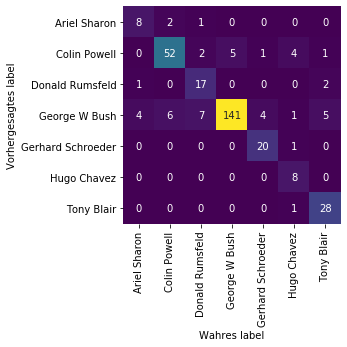

In [26]:
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, cmap='viridis',
            xticklabels=lfw_people.target_names,
            yticklabels=lfw_people.target_names)
plt.xlabel('Wahres label')
plt.ylabel('Vorhergesagtes label');

## Visualisierung der Vorhersage ...

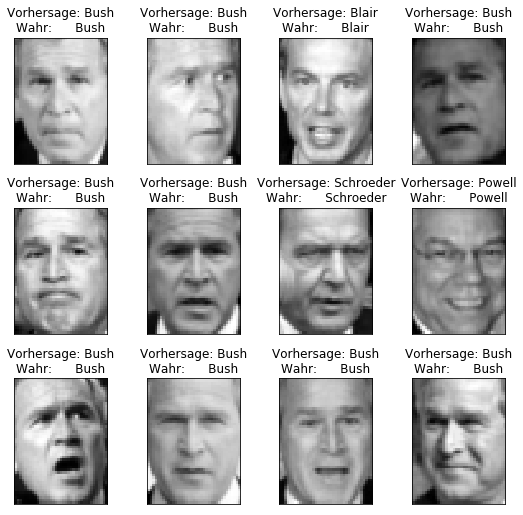

In [27]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'Vorhersage: %s\nWahr:      %s' % (pred_name, true_name)

prediction_titles = [title(y_pred, y_test, target_names, i)
                     for i in range(y_pred.shape[0])]

plot_gallery(X_test, prediction_titles, h, w)
plt.show()

In [28]:
X_test.shape

(322, 1850)

In [29]:
def plot_gallery_cond(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(X_test[i].reshape((h, w)), cmap=plt.cm.gray)
        #plt.title(titles[i], size=12)
        plt.ylabel(lfw_people.target_names[y_pred[i]].split()[-1], 
                    color='black' if y_pred[i] == y_test[i] else 'red')
        plt.suptitle('Vorhergesagte Namen; Falsche Labels in Rot', size=12)
        plt.xticks(())
        plt.yticks(())

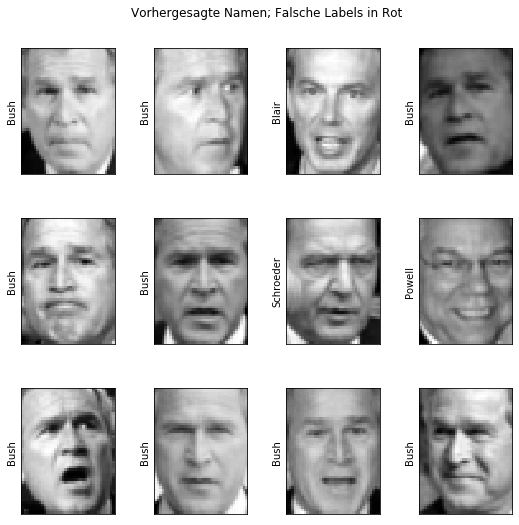

In [30]:
plot_gallery_cond(X_test, prediction_titles, h, w)

Quellen:

https://www.geeksforgeeks.org/ml-face-recognition-using-pca-implementation/

https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html#sphx-glr-auto-examples-applications-plot-face-recognition-py

https://github.com/mrolarik/basic-machine-learning-using-scikit-learn/blob/master/010-Face-Recognition.ipynb

https://towardsdatascience.com/eigenfaces-face-classification-in-python-7b8d2af3d3ea
